In [1]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.1 MB/s eta 0:00:00


In [2]:
import praw

In [4]:
client_id = 'client-id'
client_secret = 'secret token'
username = 'Your username'
password = 'Your password'
user_agent = 'RedditDataAnalysis/1.0 (Google Colab - Contact: dhruvgoyal7056@gmail.com)'

reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     username=username,
                     password=password,
                     user_agent=user_agent)

In [21]:
subreddit = reddit.subreddit('python')
top_posts = subreddit.top(limit=10)
for post in top_posts:
    print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Lad wrote a Python script to download Alexa voice recordings, he didn't expect this email.
This post has:
I redesign the Python logo to make it more modern
Automate the boring stuff with python - tinder
Just finished programming and building my own smart mirror in python, wrote all of the code myself and implemented my own voice control and facial recognition features
I'm excited to share my first published book, Introduction to Python Programming for Business and Social Science Applications -- specifically geared towards students not specifically in computer science
Drawing Mona Lisa with 256 circles using evolution [Github repo in comments]
I made a simulation using Python in which a neural network learns to race
Thanks to everyone’s advice, my mouse drawing algorithm has gotten much better and faster!
Debugging Cheat Sheet


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob  # Import TextBlob for sentiment analysis

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Example usage
post_titles = [
    "Lad wrote a Python script to download Alexa voice recordings, he didn't expect this email.",
    "I redesign the Python logo to make it more modern",
    "Automate the boring stuff with python - tinder",
    "Just finished programming and building my own smart mirror in python, wrote all of the code myself and implemented my own voice control and facial recognition features",
    "I'm excited to share my first published book, Introduction to Python Programming for Business and Social Science Applications -- specifically geared towards students not specifically in computer science",
    "Drawing Mona Lisa with 256 circles using evolution [Github repo in comments]",
    "I made a simulation using Python in which a neural network learns to race",
    "Thanks to everyone’s advice, my mouse drawing algorithm has gotten much better and faster!",
    "Debugging Cheat Sheet"
]

cleaned_titles = []  # Create an empty list to store cleaned titles

for title in post_titles:
    cleaned_title = preprocess_text(title)
    cleaned_titles.append(cleaned_title)  # Append cleaned title to the list

# Sentiment analysis using TextBlob
sentiments = []
for cleaned_title in cleaned_titles:
    blob = TextBlob(cleaned_title)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment = 'positive'
    elif sentiment_score < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    sentiments.append(sentiment)
    print(f"Cleaned Title: {cleaned_title}\nSentiment: {sentiment}\n")

# Visualize sentiment distribution
# Create a bar chart or any other suitable visualization
# ...


Cleaned Title: lad wrote python script download alexa voic record didnt expect email
Sentiment: neutral

Cleaned Title: redesign python logo make modern
Sentiment: positive

Cleaned Title: autom bore stuff python tinder
Sentiment: neutral

Cleaned Title: finish program build smart mirror python wrote code implement voic control facial recognit featur
Sentiment: positive

Cleaned Title: im excit share first publish book introduct python program busi social scienc applic specif gear toward student specif comput scienc
Sentiment: positive

Cleaned Title: draw mona lisa 256 circl use evolut github repo comment
Sentiment: neutral

Cleaned Title: made simul use python neural network learn race
Sentiment: neutral

Cleaned Title: thank everyon advic mous draw algorithm gotten much better faster
Sentiment: positive

Cleaned Title: debug cheat sheet
Sentiment: neutral



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


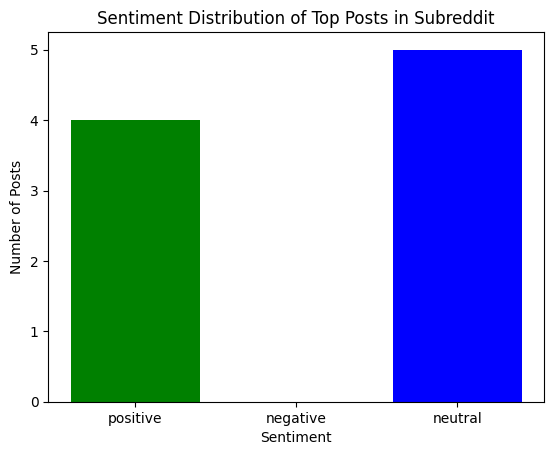

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'sentiments' list containing sentiment labels

# Count the occurrences of each sentiment
sentiment_counts = {
    'positive': sentiments.count('positive'),
    'negative': sentiments.count('negative'),
    'neutral': sentiments.count('neutral')
}

# Data for plotting
labels = sentiment_counts.keys()
values = sentiment_counts.values()

# Create a bar chart
plt.bar(labels, values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.title('Sentiment Distribution of Top Posts in Subreddit')
plt.show()


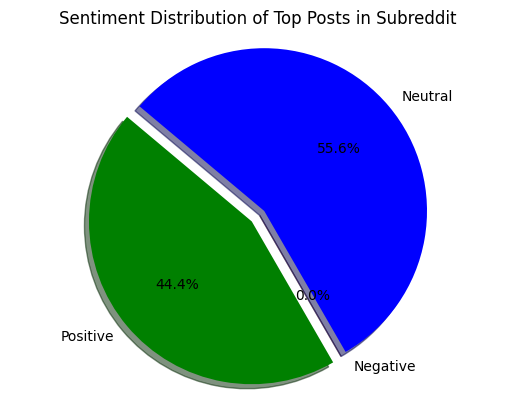

In [17]:
import matplotlib.pyplot as plt

# Assuming you have defined sentiment_counts as shown in your previous code
total_posts = len(sentiments)
positive_percentage = (sentiment_counts['positive'] / total_posts) * 100
negative_percentage = (sentiment_counts['negative'] / total_posts) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_posts) * 100

# Data for pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive) for emphasis

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.title('Sentiment Distribution of Top Posts in Subreddit')

plt.show()
